# Look at output of PhaseScanGun.py

We start by loading in the required modules.

In [1]:
# Standard modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import pandas as pd

# User defined modules
import pyPartAnalysis.IMPACTZ_analysis as imp

We edit some of the parameters of matplotlib to make it easier to view.

In [2]:
plt.rcParams['figure.facecolor']='white'
matplotlib.rcParams['figure.dpi'] = 100

# Plot the Phase Scan

We first load in the phase scan data:

In [3]:
phi = np.load("gun_Phase.npy")
KE = np.load("gun_Energy.npy")

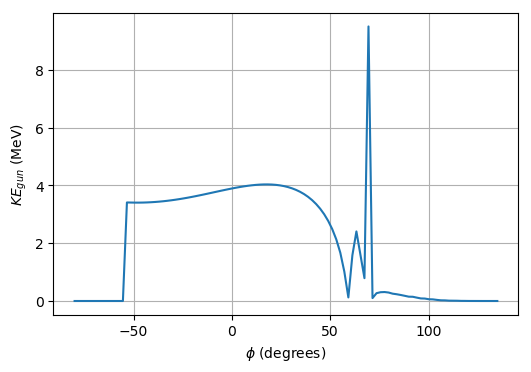

In [4]:
plt.plot(phi[KE<10],KE[KE<10]);
plt.grid()
plt.xlabel('$\phi$ (degrees)');
plt.ylabel('$KE_{gun}$ (MeV)');

We can find the phase that gives the highest energy gain as well as the kinetic energy using the commands below:

In [5]:
phi[np.argmax(KE)]

65.38095238095238

In [6]:
KE[np.argmax(KE)]

236.2103

Note that this gives an unphysical value out in a noisy region. We thus repeat the above command after filtering the continuous region.

In [7]:
ind = (phi < 50) & (phi > -50)
phi_temp = phi[ind]
KE_temp = KE[ind]

In [8]:
phi_temp[np.argmax(KE_temp)]

18.285714285714278

In [9]:
np.max(KE_temp)

4.0334687

We can also find the phase that gives the maximum energy gain more accurately using the FindMaxPhase.py script. We leave this part commented, as the user may have not run the script that creates the output.

In [10]:
# maxPhase = np.load("maxPhase.npy",allow_pickle=True).item()

In [11]:
# maxPhase.x

In [12]:
# maxPhase.fun

# Gun Fields

Due to the way this version of IMPACT-T reads in the fields maps, we can reconstruct the on-axis fields in the gun using the rfdata1 and rfdata2 files. Note that the Fourier utility used to fit the on-axis fields usees symmetry about the z=0 point, reflecting the fields to create a better fit. Thus, the fields we load in have unneccessary field data for z<0 that can be ignored by changing the plotting limits.

In [13]:
gunF1 = pd.read_csv('rfdata1',skiprows=1,header=None,names=['Ez','Ezp','Ezpp','Ezppp'],sep='\s+',skipfooter=2,engine='python')
gunF2 = pd.read_csv('rfdata2',skiprows=1,header=None,names=['Ez','Ezp','Ezpp','Ezppp'],sep='\s+',skipfooter=2,engine='python')

In [14]:
z = np.linspace(-0.14865,0.14865,gunF1.shape[0])

The Fourier utility that fits the fields scales the fields so that the max is 1. Thus, we apply the scaling used in the input file, which gives a gradient of around 120 MV/m.

In [15]:
scaleF1 = -8.87858452747296E+07*1e-6
scaleF2 = -1.043586084992688E+08*1e-6
# scaleF1 = 1
# scaleF2 = 1

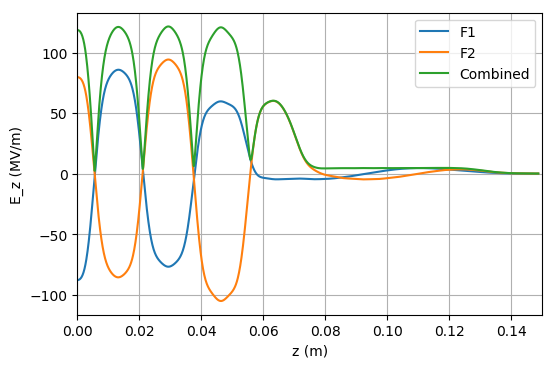

In [16]:
plt.plot(z,gunF1.Ez.values*scaleF1);
plt.plot(z,gunF2.Ez.values*scaleF2);
combinedFields = np.sqrt((gunF1.Ez*scaleF1)**2+(gunF2.Ez*scaleF2)**2);
plt.plot(z,combinedFields.values);
plt.grid();
plt.legend(['F1','F2','Combined']);
plt.xlabel('z (m)');
plt.ylabel('E_z (MV/m)');
plt.xlim([0,0.15]);

Here we find the maximum field value:

In [17]:
np.max(combinedFields)

121.70105974599184

Here we find the field value at z=0 or at the cathode.

In [18]:
combinedFields[combinedFields.shape[0]//2]

118.71933718963679